# Analise de atraso de entregas
Por que as entregas atrasam? 
Como prever os atrasos?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import time

import warnings
warnings.filterwarnings('ignore')

### 1- Coleta de dados

In [2]:
df_entregas = pd.read_csv("C:/Users/lavin/Downloads/Train.csv")
df_entregas.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
df_entregas.shape

(10999, 12)

In [11]:
df_entregas.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [13]:
df_entregas.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [16]:
df_entregas.duplicated().sum()

np.int64(0)

In [17]:
df_entregas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
#Traduzi as colunas pra portugues só pra ter um melhor entendimento

df_entregas.columns = ['ID',
                 'Bloco_Armazem',
                 'Mode_Envio',
                 'Chamadas_Suporte',
                 'Avaliação_Cliente',
                 'Custo_Produto',
                 'Compras_Anteriores',
                 'Importancia_Produto',
                 'Sexo',
                 'Desconto',
                 'Peso_Produto',
                 'Entregue_no_Prazo_S/N']
df_entregas.head()

,ID,Bloco_Armazem,Mode_Envio,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Importancia_Produto,Sexo,Desconto,Peso_Produto,Entregue_no_Prazo_S/N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


--------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2- Tratando outliers

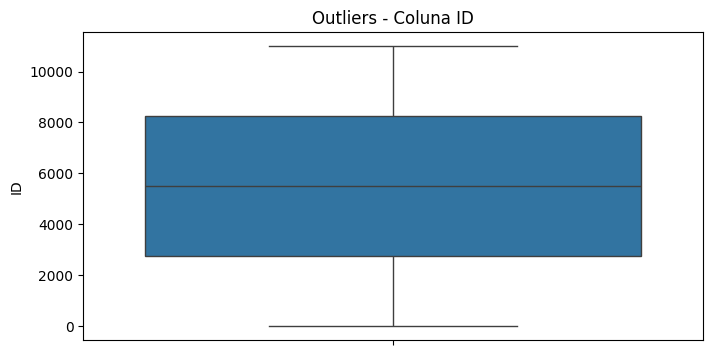

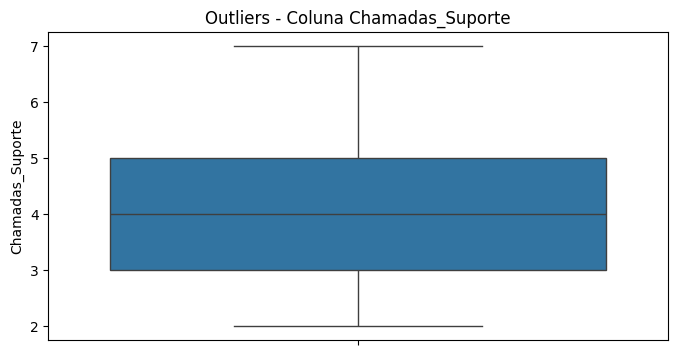

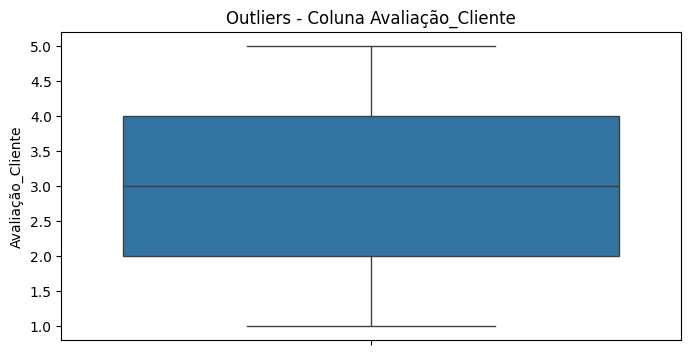

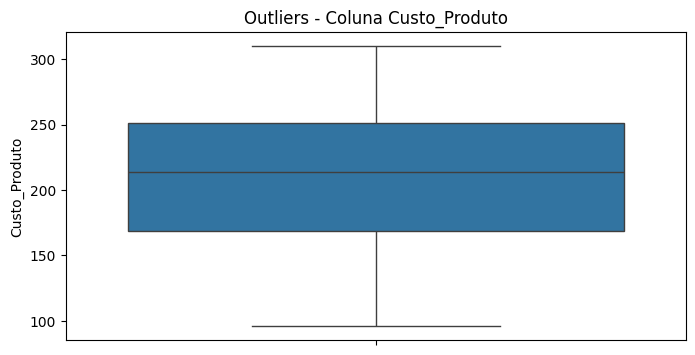

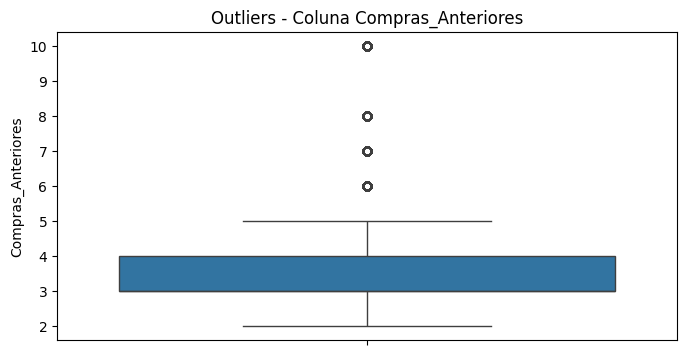

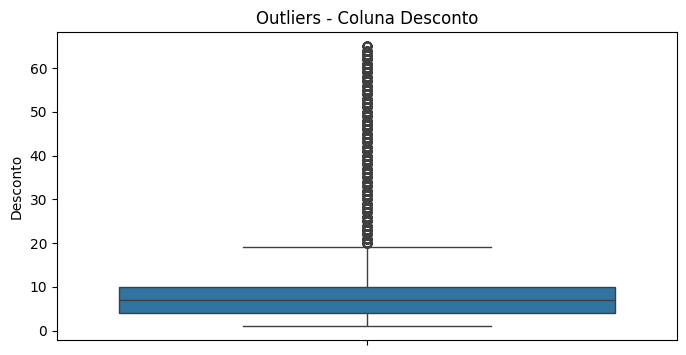

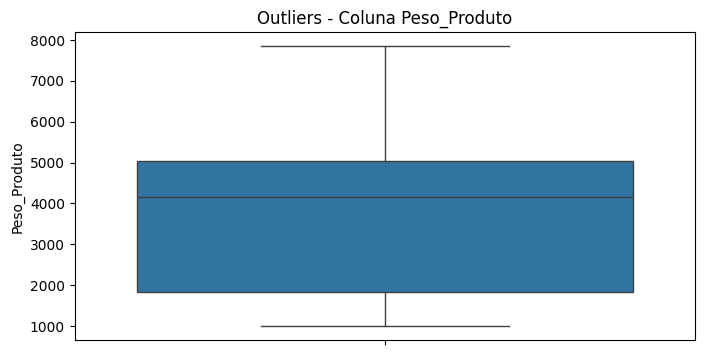

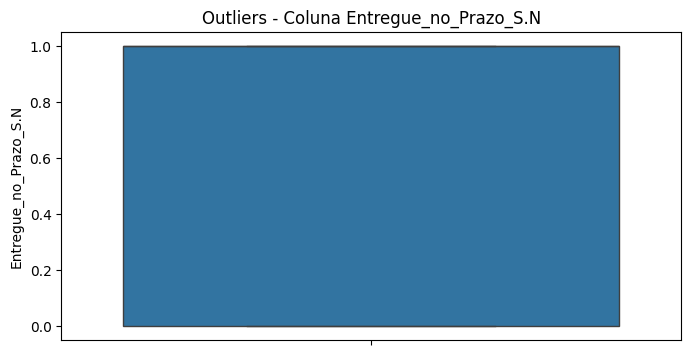

In [71]:
#grafico boxplot para conseguir visualizar os outliers

for i in df_entregas.columns:
    if df_entregas[i].dtype == 'int64':
        plt.figure(figsize = (8, 4))
        sns.boxplot(data = df_entregas[i])
        plt.xticks(rotation=45)
        plt.title(f"Outliers - Coluna {i}")
plt.show()

**Não julguei necessario tratar esses poucos outliers**

-------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3- Analise Exploratoria

In [7]:
#Temos bastantes pedidos com atraso no prazo de entrega
df_entregas['Entregue_no_Prazo_S/N'].value_counts()

Entregue_no_Prazo_S/N
1    6563
0    4436
Name: count, dtype: int64

In [42]:
df_entregas['Mode_Envio'].value_counts()

Mode_Envio
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [54]:
df_entregas.describe()

,ID,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Desconto,Peso_Produto,Entregue_no_Prazo_S.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
#Visualizando as avaliações que são menores que 3 
df_avaliacao = df_entregas[df_entregas['Avaliação_Cliente'] < 3]
df_avaliacao.head()

,ID,Bloco_Armazem,Mode_Envio,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Importancia_Produto,Sexo,Desconto,Peso_Produto,Entregue_no_Prazo_S/N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1


In [10]:
#Visualizando os pedidos que não foram entregues no prazo e tem avaliação menor que 3
df_PrazoNegativo = df_avaliacao[df_avaliacao['Entregue_no_Prazo_S/N']== 0 ]
df_PrazoNegativo.head()

,ID,Bloco_Armazem,Mode_Envio,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Importancia_Produto,Sexo,Desconto,Peso_Produto,Entregue_no_Prazo_S/N
3146,3147,A,Flight,4,1,172,3,medium,M,7,4883,0
3147,3148,B,Flight,4,2,272,3,high,F,6,4559,0
3152,3153,A,Flight,4,2,237,6,low,F,8,5695,0
3153,3154,B,Flight,3,2,153,10,high,M,2,5455,0
3157,3158,F,Flight,4,2,246,3,low,F,7,5616,0


In [18]:
#Vendo a media de vezes que os clientes ligam para o suporte (Com avaliações menores que 3 e Prazo de entrega atrasado)
df_PrazoNegativo['Chamadas_Suporte'].mean().round()

np.float64(4.0)

In [30]:
#Clientes com Prazo de entrega atrasado costumam avaliar o nosso serviço com 1 estrelas
df_PrazoNegativo['Avaliação_Cliente'].mean().round()

np.float64(1.0)

In [31]:
df_PrazoNegativo['Mode_Envio'].value_counts()

Mode_Envio
Ship      1218
Flight     299
Road       297
Name: count, dtype: int64

In [29]:
df_PrazoNegativo['Custo_Produto'].mean().round()

np.float64(214.0)

In [55]:
df_PrazoNegativo['Peso_Produto'].mean().round()

np.float64(4173.0)

In [58]:
df_PrazoNegativo['Importancia_Produto'].value_counts()

Importancia_Produto
low       868
medium    813
high      133
Name: count, dtype: int64

### Porque os Pedidos Atrasam:
- Os pedidos mais mal avaliados tem em media 1 estrela de avaliação
- Os que mais atrasam são enviados por navios 
- Pedidos atrasados tem media de 4 chamadas de suporte 
- São mais pesados, tem em media 4173 libras
- São mais caros e tem valor em  media de 214 dolares

-------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
#Visualizando as avaliações que são maiores que 3 
df_avaliacao2 = df_entregas[df_entregas['Avaliação_Cliente'] > 3]
df_avaliacao2.head()

,ID,Bloco_Armazem,Mode_Envio,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Importancia_Produto,Sexo,Desconto,Peso_Produto,Entregue_no_Prazo_S/N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1


In [13]:
#Visualizando os pedidos que foram entregues no prazo e tem avaliação maior que 3
df_PrazoPositivo = df_avaliacao2[df_avaliacao2['Entregue_no_Prazo_S/N']== 1 ]
df_PrazoPositivo.head()

,ID,Bloco_Armazem,Mode_Envio,Chamadas_Suporte,Avaliação_Cliente,Custo_Produto,Compras_Anteriores,Importancia_Produto,Sexo,Desconto,Peso_Produto,Entregue_no_Prazo_S/N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1


In [69]:
#Vendo a media de vezes que os clientes ligam para o suporte (Com avaliações menores que 3 e Prazo de entrega atrasado)
df_PrazoPositivo['Chamadas_Suporte'].mean().round()

np.float64(4.0)

In [68]:
#Clientes com Prazo de entrega atrasado costumam avaliar o nosso serviço com 5 estrelas
df_PrazoPositivo['Avaliação_Cliente'].mean().round()

np.float64(5.0)

In [70]:
df_PrazoPositivo['Mode_Envio'].value_counts()

Mode_Envio
Ship      1779
Flight     426
Road       415
Name: count, dtype: int64

In [71]:
df_PrazoPositivo['Custo_Produto'].mean().round()

np.float64(208.0)

In [73]:
df_PrazoPositivo['Peso_Produto'].mean().round()

np.float64(3292.0)

In [74]:
df_PrazoPositivo['Importancia_Produto'].value_counts()

Importancia_Produto
low       1250
medium    1124
high       246
Name: count, dtype: int64

In [ ]:
df_P

### Pedidos com Prazo Positivo tem o maior numero de entregas por navio e media de 4 chamadas de suporte mas:
- São mais leves pesando em média 3292 libras
- São mais baratos custando em média 208 dolares
-  E média de avaliação de 5 estrelas

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4 - Visualização de dados

Vou criar um grafico pra comparar numero de Prazos Entregues e depois fazer outro grafico retirando produtos com peso menor que 3292 e valor menor que 208 para compararmos as diferenças

<Axes: title={'center': 'Prazos Positivos x Prazos Negativos'}, xlabel='Entregue_no_Prazo_S/N'>

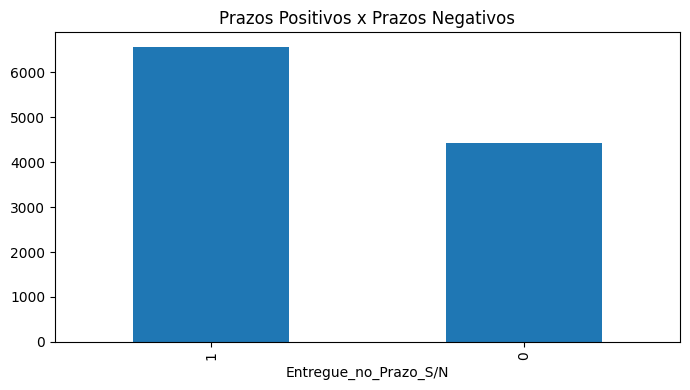

In [23]:
#Grafico Atual comparando os prazos 
plt.rcParams['figure.figsize'] = (7.00 , 4.00)
plt.rcParams['figure.autolayout'] = True
df_entregas['Entregue_no_Prazo_S/N'].value_counts().plot(kind = 'bar', title = "Prazos Positivos x Prazos Negativos" )

In [28]:
#Novo dataframe sem os problemas do df_entregas original
df_grafico = df_entregas[(df_entregas['Peso_Produto'] < 3292) & (df_entregas['Custo_Produto'] < 208)]

<Axes: title={'center': 'Prazos Positivos x Prazos Negativos'}, xlabel='Entregue_no_Prazo_S/N'>

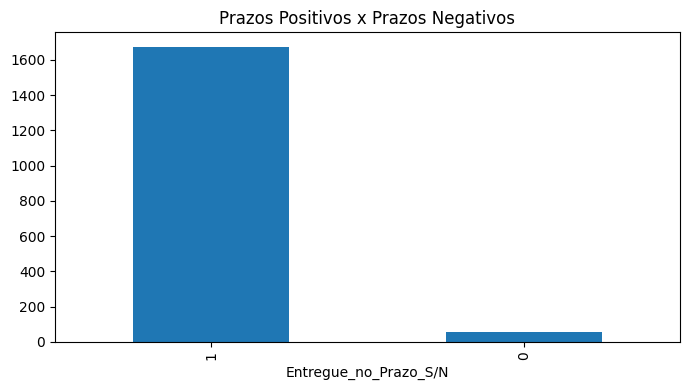

In [29]:
#Grafico novo comparando os prazos 
plt.rcParams['figure.figsize'] = (7.00 , 4.00)
plt.rcParams['figure.autolayout'] = True
df_grafico['Entregue_no_Prazo_S/N'].value_counts().plot(kind = 'bar', title = "Prazos Positivos x Prazos Negativos" )

**Com pedidos mais leves e preços menores nós conseguimos diminuir os Prazos de entrega negativos**

----------------------------------------------------------------------------------------------------------------------------------------------------------

### 5- Treinando um modelo para prever atrasos de entrega

In [30]:
df_entregas2 = df_entregas.copy()

In [32]:
#Label encoder na unica coluna categorica q eu vou usar
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_entregas2['Mode_Envio'] = lb.fit_transform(df_entregas2['Mode_Envio'])

In [34]:
preditoras = df_entregas2[['Mode_Envio', 'Peso_Produto','Custo_Produto','Avaliação_Cliente']]
alvo = df_entregas2['Entregue_no_Prazo_S/N']

In [39]:
#Treinando o modelo
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, alvo, random_state = 42)

In [40]:
#Testando modelos de ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

arvore_decisao = RandomForestClassifier()
knn = KNeighborsClassifier()

arvore_decisao.fit(x_treino, y_treino)
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [43]:
#Vendo qual modelo se deu melhor
from sklearn.metrics import accuracy_score

previsao_arvore  = arvore_decisao.predict(x_teste)
previsao_knn = knn.predict(x_teste)

print(f'Acuracia modelo Arvore Decisão: {accuracy_score(y_teste, previsao_arvore)}')
print(f'Acuracia modelo KNN:{accuracy_score(y_teste, previsao_knn)}')

Acuracia modelo Arvore Decisão: 0.6487272727272727
Acuracia modelo KNN:0.6505454545454545


**O modeloo ja esta pronto para previsões futuras agora eu só vou salvar**

In [44]:
#Salvando o modelo
import joblib 
joblib.dump(knn,'modelo_knn.pkl')

['modelo_knn.pkl']